In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pystan
from scipy.stats import mstats
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [6]:
df = pd.read_excel("./data/real_estate1.xlsx")

In [7]:
df.head()

,id,space,room,value
0,1,50,2LDK,3050
1,2,70,2LDK,4690
2,3,70,2SLDK,4830
3,4,70,3LDK,5040
4,5,90,3LDK,6570


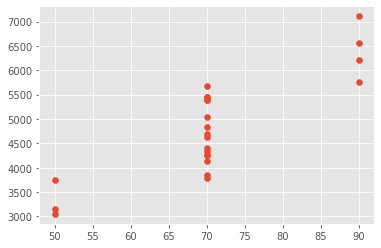

In [5]:
plt.scatter(df["space"], df["value"])

In [23]:
stan_model="""
    data{
    int N; 
    real X[N];
    real Y[N];
    int N_s;
    real X_s[N_s];
    }
    
parameters{
    real a;
    real b;
    real<lower=0> sigma;
}

model{
    for (n in 1:N){
        Y[n] ~ normal(a*X[n]+b, sigma);
    }
}

generated quantities{
    real Y_s[N_s];
    for (n in 1:N_s){
        Y_s[n]=normal_rng(a*X_s[n]+b, sigma);
    }
}
"""

In [24]:
sm=pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a5453006f6f751577b46d2dda7627d74 NOW.


In [28]:
X_s=np.arange(40, 90, 1)
N_s=X_s.shape[0]

stan_data={"N":df.shape[0], "X":df["space"], "Y":df["value"], "N_s":N_s, "X_s":X_s}

In [29]:
fit = sm.sampling(data=stan_data, iter=2000,warmup=500, chains=3, seed=123)

In [32]:
fit.extract("a")

array([ 76.41266253,  93.94065493,  80.63040866, ...,  95.98200868,
        53.71508784, 105.92215028])

In [34]:
ms_a=fit.extract("a")["a"]
ms_b=fit.extract("b")["b"]

(array([   2.,   21.,  136.,  473., 1173., 1439.,  851.,  313.,   73.,
          19.]),
 array([-4219.9238736 , -3552.77041172, -2885.61694984, -2218.46348795,
        -1551.31002607,  -884.15656419,  -217.00310231,   450.15035957,
         1117.30382145,  1784.45728333,  2451.61074521]),
 <a list of 10 Patch objects>)

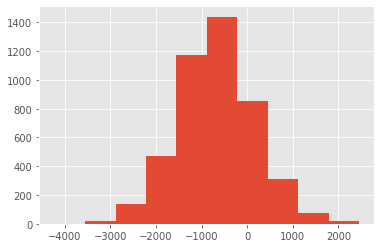

In [35]:
plt.hist(ms_b)

In [43]:
df_b=pd.DataFrame([])
for i in range(40, 90, 1):
    df_b[i]=ms_a*i+ms_b

In [44]:
df_b.head()

,40,41,42,43,44,45,46,47,48,49,...,80,81,82,83,84,85,86,87,88,89
0,2494.951533,2571.364196,2647.776858,2724.189521,2800.602183,2877.014846,2953.427508,3029.840171,3106.252833,3182.665496,...,5551.458034,5627.870697,5704.283359,5780.696022,5857.108684,5933.521347,6009.934009,6086.346672,6162.759335,6239.171997
1,1847.759777,1941.700432,2035.641086,2129.581741,2223.522396,2317.463051,2411.403706,2505.344361,2599.285016,2693.225671,...,5605.385974,5699.326629,5793.267284,5887.207939,5981.148594,6075.089249,6169.029904,6262.970558,6356.911213,6450.851868
2,2150.256798,2230.887207,2311.517615,2392.148024,2472.778432,2553.408841,2634.039250,2714.669658,2795.300067,2875.930476,...,5375.473144,5456.103553,5536.733962,5617.364370,5697.994779,5778.625188,5859.255596,5939.886005,6020.516414,6101.146822
3,2362.582375,2437.868728,2513.155081,2588.441433,2663.727786,2739.014139,2814.300491,2889.586844,2964.873197,3040.159549,...,5374.036482,5449.322835,5524.609187,5599.895540,5675.181893,5750.468245,5825.754598,5901.040951,5976.327303,6051.613656
4,2502.128603,2573.937127,2645.745652,2717.554177,2789.362701,2861.171226,2932.979750,3004.788275,3076.596800,3148.405324,...,5374.469586,5446.278110,5518.086635,5589.895160,5661.703684,5733.512209,5805.320733,5877.129258,5948.937782,6020.746307


In [45]:
low_y50, high_y50=mstats.mquantiles(df_b, [0.25, 0.75], axis=0)
low_y95, high_y95=mstats.mquantiles(df_b, [0.025, 0.975], axis=0)

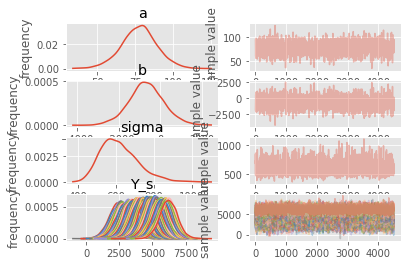

In [46]:
fig=fit.plot()

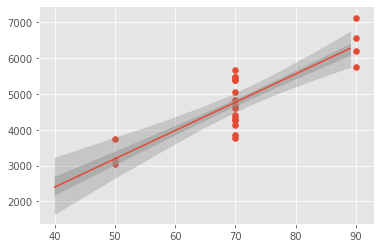

In [47]:
a = 79.03
b=-764.1
x=np.arange(40, 90, 1)
y=a*x+b
plt.plot(x, y)
plt.scatter(df["space"], df["value"])
plt.fill_between(X_s, low_y50, high_y50, alpha=0.6, color="darkgray")
plt.fill_between(X_s, low_y95, high_y95, alpha=0.3, color="gray")

In [48]:
Y_p=fit.extract("Y_s")["Y_s"]

In [51]:
low_y, high_y=mstats.mquantiles(Y_p, [0.025, 0.975], axis=0)

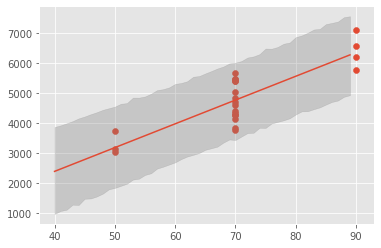

In [52]:
a = 79.03
b=-764.1
x=np.arange(40, 90, 1)
y=a*x+b
plt.plot(x, y)
plt.scatter(df["space"], df["value"])
plt.fill_between(X_s, low_y, high_y, alpha=0.3, color="gray")